In [1]:
import matplotlib.pyplot as plt
from skimage import io, color


In [2]:
img_path = "/kaggle/input/ds-dataset/datasets/Sand/dusttornado-001.jpg"
img = io.imread(img_path)
img = img/255
img_flat = img.flatten()

Last time we considered PCA as not useful because we did not
construct the inverse transformation of it.

Normally images have a lot of pixels to retain their clarity, but that significantly increases its size and slows down the performance of the system when it has to process multiple images. To overcome this situation we can use the dimensionality reduction technique which comes under Unsupervised Machine Learning.

We can also perform the same thing without splitting into blue, green, and red channels and reshaping the data into (m, n X 3) pixels, but we have found that the explained variance ratio given by the same number of PCA component is better if we use the splitting method

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

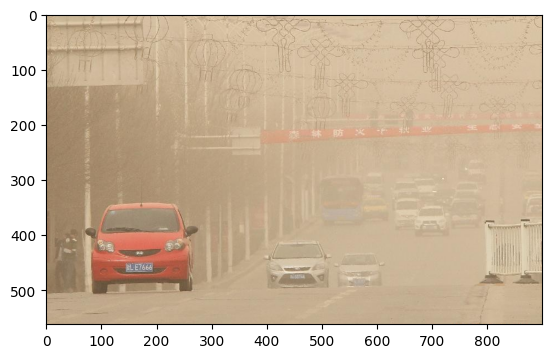

In [4]:
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [5]:
img.shape

(562, 900, 3)

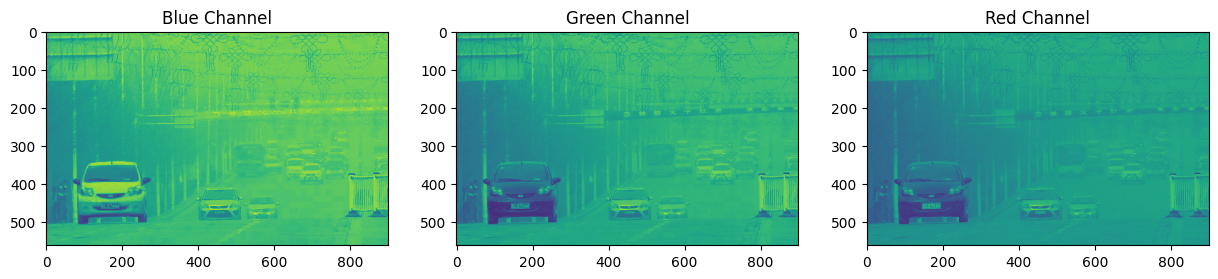

In [6]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [7]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [8]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [9]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(562, 50)
(562, 50)
(562, 50)


In [10]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.8949846255377621
Green Channel: 0.9101901019520182
Red Channel  : 0.9006241283857286


With only keeping 50 dimensions we can retain almost 90% of the image data, great improvement for computation

plot bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels:

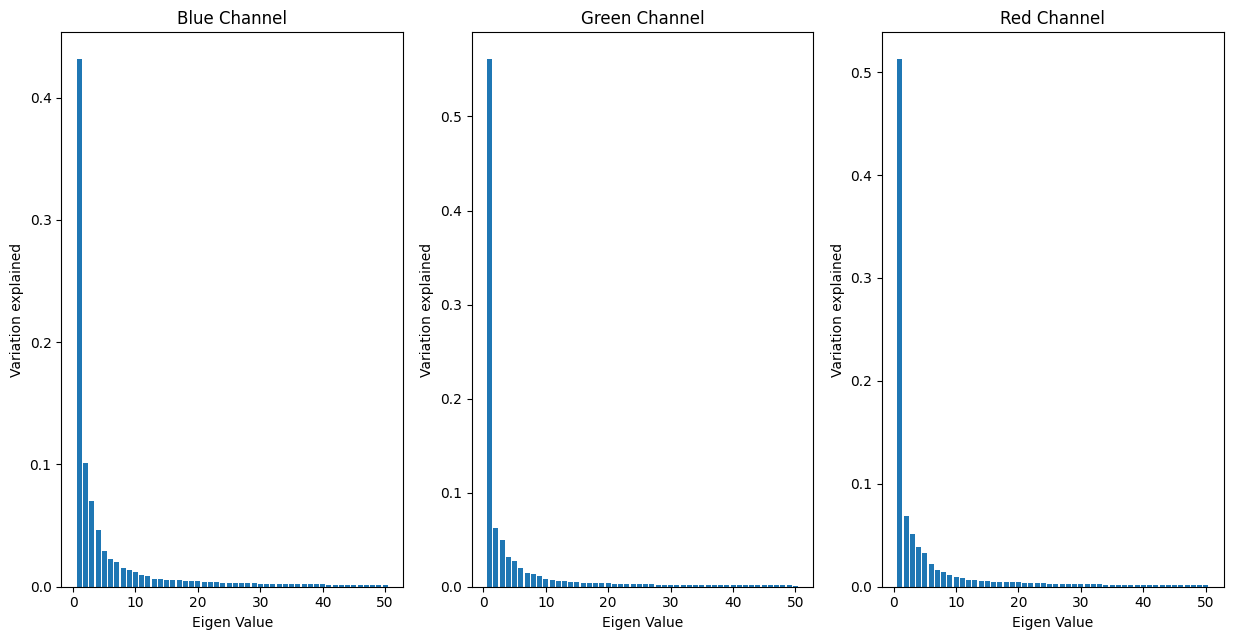

In [11]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

<h3>Reconstruct the image and visualize</h3>
We have completed our PCA dimensionality reduction. Now we will visualize the image again and for that, we have to reverse transform the data first and then merge the data of all the 3 channels into one

In [12]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(562, 900) (562, 900) (562, 900)


In [13]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(562, 900, 3)


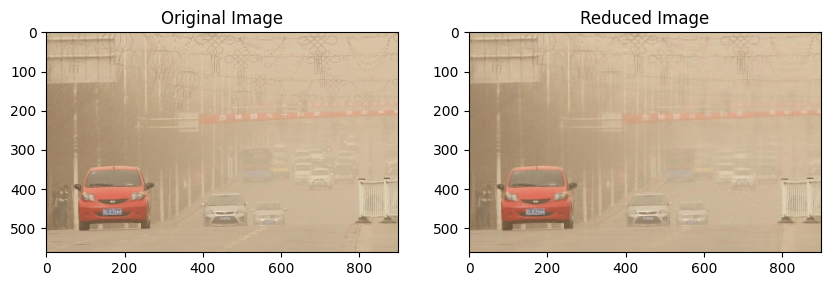

In [14]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

Similar to PCA we can use SVD

### Image convolution
Filtering , Convolution, Matrix, Color values, kernel


Convolution is a general purpose filter effect for images

It works by determining the value of a central pixel by adding the
weighted values of all its neighbors together

The output is a new modified filtered image

convolution is simply an element-wise multiplication of two matrices followed by a sum.

In [15]:
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
# import argparse

Custom function if needed

```python
def convolve(image, kernel):
    # pading can be added or not based on requirement
    # get dim of image and kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = image.shape[:2]
    
    # do pading for applying convolution
    # allocate memory for the output image, taking care of "pad"
    pad = (kW -1)//2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
                              cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    
    for y in np.arange(pad, iH+pad):
        for x in np.arange(pad, iW+pad):
            # extract region of interest
            roi = image[y - pad : y + pad + 1, x - pad : x + pad + 1]
            k = (roi * kernel).sum()
            output[y-pad, x-pad] = k
    
    output = rescale_intensity(output, in_range=(0,255))
    output = (output * 255).astype("uint8")
    return output
```

In [16]:
smallBlur = np.ones((5,5), dtype="float") * (1.0 / (5 * 5))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# kernel for sharpening img
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")


Applying small_blur kernel.


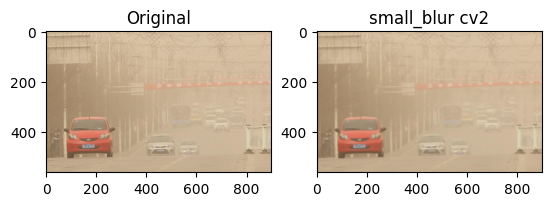

Applying large_blur kernel.


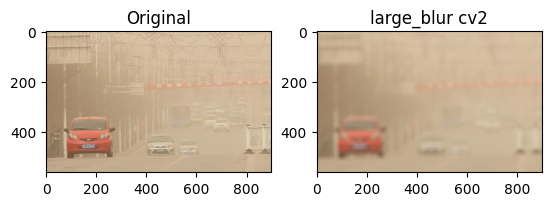

Applying sharpen kernel.


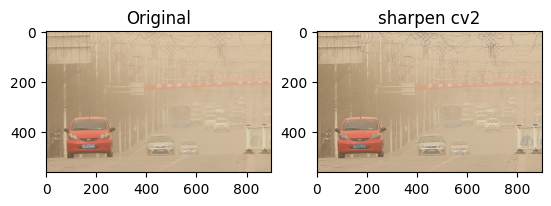

Applying laplacian kernel.


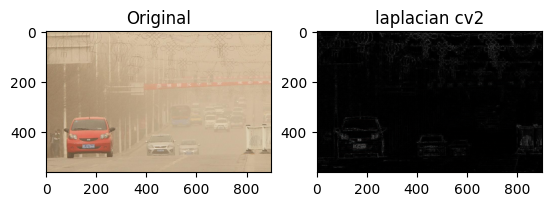

Applying sobel_x kernel.


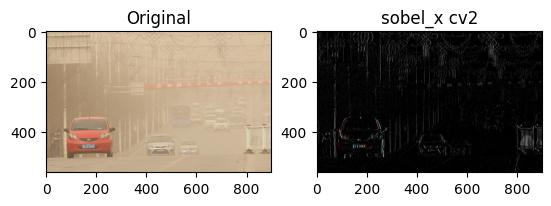

Applying sobel_y kernel.


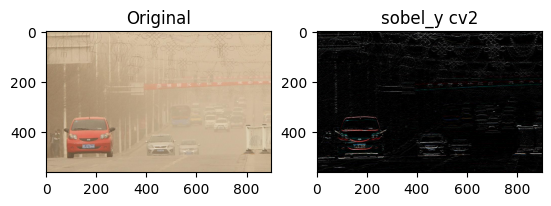

In [17]:
kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for (kernelName, kernel) in kernelBank:
    print(f"Applying {kernelName} kernel.")
    cv2Output = cv2.filter2D(img, -1, kernel)
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title(f"{kernelName} cv2")
    plt.imshow(cv2Output)
    plt.show()
    

Feature Extraction using ResNet


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

resnet = models.resnet50(pretrained=True)

In [ ]:
resnet.eval()

In [20]:
from PIL import Image

In [21]:
def extract_features(img_path):
    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0) 

    with torch.no_grad():
        features = resnet.conv1(img_tensor)
        features = resnet.bn1(features)
        features = resnet.relu(features)
        features = resnet.maxpool(features)

        features = resnet.layer1(features)
        features = resnet.layer2(features)
        features = resnet.layer3(features)
        features = resnet.layer4(features)

    return features.squeeze()[:,:,0] # remove the batch dimension

# Extract features from the image
features = extract_features(img_path)
print(features.shape)

torch.Size([2048, 7])


In [22]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Stack the features into a single array
features_array = np.stack(features, axis=0)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_array)

# Visualize the t-SNE reduced features
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1])
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Extracted Features')
plt.show()